In [12]:

from Subsample import *
from JPEG import *
from Quantisation import *

In [186]:
Chroma_Scale = 6
a = jpeg(Chroma_Scale)


In [187]:
img = cv2.imread("cat.jpg")


In [188]:
img = a.trim(img)


In [189]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)

In [190]:
Y  = img[:,:,0]
Cb  = img[:,:,2]
Cr  = img[:,:,1]

In [191]:
# Y = max_subsample(Y,Chroma_Scale)
Cb = max_subsample(Cb,Chroma_Scale)
Cr = max_subsample(Cr,Chroma_Scale)

In [192]:
# Y = supersample(Y,Chroma_Scale)
Cb = supersample(Cb,Chroma_Scale)
Cr = supersample(Cr,Chroma_Scale)

In [193]:
img = np.dstack((Y, Cr, Cb)).astype(np.uint8)
img = cv2.cvtColor(img, cv2.COLOR_YCR_CB2BGR)
cv2.imwrite("Cat_CBCR_scaled_12.jpg", img)
# cv2.imshow('Compressed Image',img)

True

In [194]:
Y.shape

(816, 1248)

In [195]:
Cb.shape

(816, 1248)

In [196]:
Cr.shape

(816, 1248)

In [3]:
import numpy as np
np.rand((8,8))


AttributeError: module 'numpy' has no attribute 'rand'

In [7]:
a = np.random.randint(255,size= (8,8))

In [8]:
a


array([[217, 181, 187,  27, 150,  77, 195,  50],
       [ 21,  85, 223,  58,  63, 183, 185,  78],
       [ 68, 121,  81,  78, 244, 154, 158, 247],
       [216, 199, 133, 108,  69, 251,  60,  89],
       [181, 157,  57,  14,  89, 169, 130, 130],
       [144, 234, 177,   5, 161, 185, 233,  35],
       [ 11, 133,  87, 133, 214, 243, 232,  95],
       [223, 170, 227,  17,   9, 111, 242,  59]])

In [9]:
zigzagbuff(zigzagflat(a))

array([[217, 181, 187,  27, 150,  77, 195,  50],
       [ 21,  85, 223,  58,  63, 183, 185,  78],
       [ 68, 121,  81,  78, 244, 154, 158, 247],
       [216, 199, 133, 108,  69, 251,  60,  89],
       [181, 157,  57,  14,  89, 169, 130, 130],
       [144, 234, 177,   5, 161, 185, 233,  35],
       [ 11, 133,  87, 133, 214, 243, 232,  95],
       [223, 170, 227,  17,   9, 111, 242,  59]])

In [14]:
inv_Quant_Y(Quant_Y(a))

array([[224, 176, 190,  32, 144,  80, 204,  61],
       [ 24,  84, 224,  57,  52, 174, 180,  55],
       [ 70, 117,  80,  72, 240, 171, 138, 224],
       [210, 204, 132, 116,  51, 261,  80,  62],
       [180, 154,  74,   0,  68, 218, 103, 154],
       [144, 245, 165,   0, 162, 208, 226,   0],
       [  0, 128,  78, 174, 206, 242, 240, 101],
       [216, 184, 190,   0,   0, 100, 206,  99]])

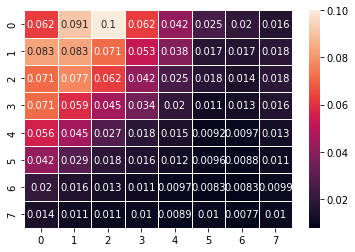

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

Gy = np.array([[1,2,1],
                [0,0,0],
                [-1,-2,-1]])
Gx = np.array([[1,0,-1],
                [2,0,-2],
                [1,0,-1]])
kernel = np.array([[0,0,1,2,1,0,0],
                       [0,3,13,22,13,3,0],
                       [1,13,59,97,59,13,1],
                       [2,22,97,159,97,22,2],
                       [1,13,59,97,59,13,1],
                       [0,3,13,22,13,3,0],
                       [0,0,1,2,1,0,0]])/1003    

dft_coeff = np.array([[0.35355339, 0.35355339,0.35355339,0.35355339,0.35355339,0.35355339,0.35355339,0.35355339],
                    [0.49039264,0.41573481,0.27778512,0.09754516,-0.09754516,-0.27778512,-0.41573481,-0.49039264],
                    [0.46193977,0.19134172,-0.19134172,-0.46193977,-0.46193977,-0.19134172,0.19134172,0.46193977],
                    [0.41573481,-0.09754516,-0.49039264,-0.27778512,0.27778512,0.49039264,0.09754516,-0.41573481],
                    [0.35355339,-0.35355339,-0.35355339,0.35355339,0.35355339,-0.35355339,-0.35355339,0.35355339],
                    [0.27778512,-0.49039264,0.09754516,0.41573481,-0.41573481,-0.09754516,0.49039264,-0.27778512],
                    [0.19134172,-0.46193977,0.46193977,-0.19134172,-0.19134172,0.46193977,-0.46193977,0.19134172],
                    [0.09754516,-0.27778512,0.41573481,-0.49039264,0.49039264,-0.41573481,0.27778512,-0.09754516]])

Q_50_Y = np.array([[16,11,10,16,24,40,51,61],
                    [12,12,14,19,26,58,60,55],
                    [14,13,16,24,40,57,69,56],
                    [14,17,22,29,51,87,80,62],
                    [18,22,37,56,68,109,103,77],
                    [24,35,55,64,81,104,113,92],
                    [49,64,78,87,103,121,120,101],
                    [72,92,95,98,112,100,130,99]])

uniform_data = 1/Q_50_Y
ax = sns.heatmap(uniform_data, annot=uniform_data, linewidth=0.5)
plt.show()

C:\Users\Divyansh Mittal\AppData\Local\Temp\ipykernel_21796\1827638263.py:25: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


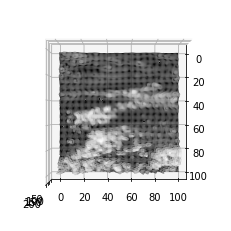

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# generate some sample data
import scipy.misc
lena = cv2.imread("cat.jpg")

lena = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)[300:400,200:300]
# lena = max_subsample(lena,1)[300:400,200:300]
# 
lena_n = cv2.imread("catcompressed.png")

lena_n = cv2.cvtColor(lena_n, cv2.COLOR_BGR2GRAY)[300:400,200:300]
# lena_n = max_subsample(lena_n,1)[300:400,200:300]
# downscaling has a "smoothing" effect

# lena = scipy.misc.imresize(lena, 0.15, interp='cubic')

# create the x and y coordinate arrays (here we just use pixel indices)
xx, yy = np.mgrid[0:lena.shape[0], 0:lena.shape[1]]

# create the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(azim=0, elev=90)
ax.plot_surface(xx, yy, lena ,rstride=1, cstride=1, cmap=plt.cm.gray,
        linewidth=0)

# show it
plt.show()



C:\Users\Divyansh Mittal\AppData\Local\Temp\ipykernel_21796\1508600880.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


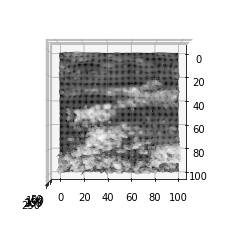

In [50]:
xx, yy = np.mgrid[0:lena_n.shape[0], 0:lena_n.shape[1]]

# create the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(azim=0, elev=90)
ax.plot_surface(xx, yy, lena_n ,rstride=1, cstride=1, cmap=plt.cm.gray,
        linewidth=0)

# show it
plt.show()

In [72]:
img = cv2.imread("flowercompressed.png")

In [73]:
img.shape

(528, 800, 3)

In [74]:
img.shape[0]//8

66

In [75]:
img.shape[1]//8

100

In [69]:
img_new = np.zeros((528+4*67,800+4*101,3))

In [76]:
for i in range (img.shape[0]):
    for j in range (img.shape[1]):
        for k in range(img.shape[2]):
            img_new[i + ((i//8)*4),j + ((j//8)*4),k] = img[i,j,k]

In [71]:
cv2.imwrite("blow_flower_c.jpg", img_new)
# cv2.imshow('Compressed Image',img)

True